In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train.shape[1:]

(28, 28)

In [6]:
#data should always be of the format “(Number of data points, data point dimension)”. In this case, the training data will be of format 60,000×784.
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
input_img= Input(shape=(784,))

In [9]:
encoded = Dense(units=32, activation='relu')(input_img)

In [10]:
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [11]:
autoencoder=Model(input_img, decoded)

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
encoder = Model(input_img, encoded)

In [14]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25120 (98.12 KB)
Trainable params: 25120 (98.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 7s 6ms/step - loss: 0.2772 - accuracy: 0.0137 - val_loss: 0.1885 - val_accuracy: 0.0139
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1700 - accuracy: 0.0121 - val_loss: 0.1529 - val_accuracy: 0.0112
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1439 - accuracy: 0.0101 - val_loss: 0.1334 - val_accuracy: 0.0113
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1284 - accuracy: 0.0103 - val_loss: 0.1208 - val_accuracy: 0.0120
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1177 - accuracy: 0.0108 - val_loss: 0.1121 - val_accuracy: 0.0121
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1104 - accuracy: 0.0110 - val_loss: 0.1061 - val_accuracy: 0.0118
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1053 - accuracy: 0.0113 - val_loss: 0.1021 - val_accuracy: 0.0102
Epoch 

In [17]:
encoded_imgs = encoder.predict(X_test)


313/313 [==============================] - 1s 2ms/step


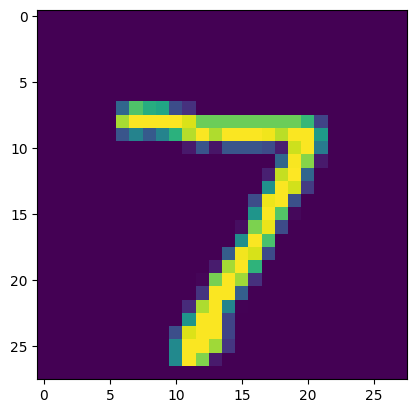

In [18]:
plt.imshow(X_test[0].reshape(28,28))

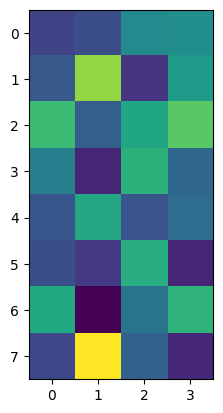

In [19]:
plt.imshow(encoded_imgs[0].reshape(8,4))

In [20]:
predicted = autoencoder.predict(X_test)

313/313 [==============================] - 1s 3ms/step


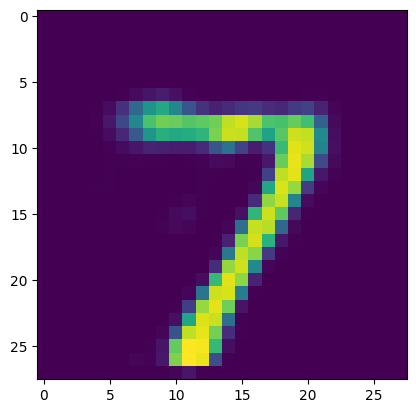

In [21]:
plt.imshow(predicted[0].reshape(28,28))

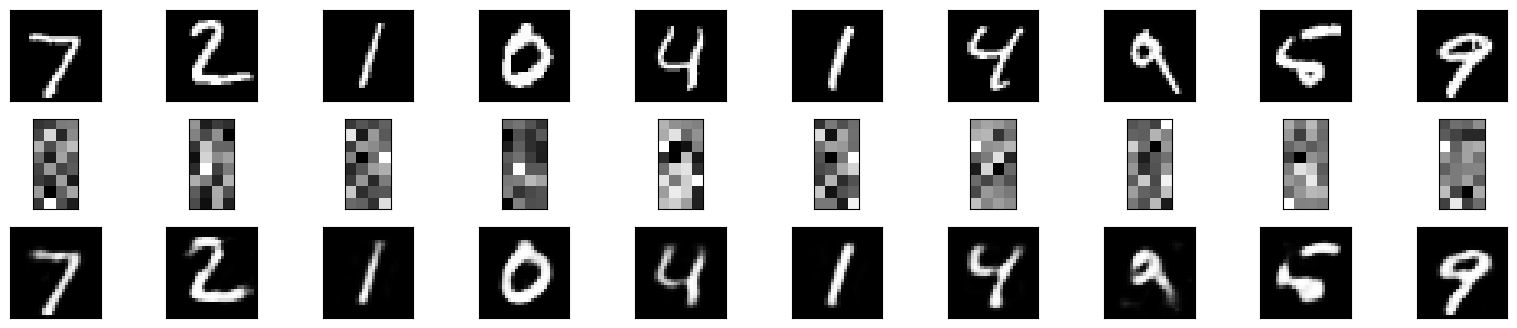

In [22]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



plt.show()
